Final Task: Aim to classify the tweets.

In [1]:
import shutil


import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!gdown --id 1RARLRRVmkaoHQV05pfGIvyBH6XRjcSr9

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RARLRRVmkaoHQV05pfGIvyBH6XRjcSr9
To: /content/tweets.csv
100% 8.70M/8.70M [00:00<00:00, 27.8MB/s]


In [3]:
data= pd.read_csv('tweets.csv')
data

,Unnamed: 0,tweet,target
0,0,ndtv anchor let go over to aap live press conf...,0
1,1,sambit patra attacks rahul gandhi over his cow...,0
2,2,crediting the bjp with taking development to s...,1
3,3,ktrbrs do do false allegations on iasassociati...,0
4,4,gujarat assembly yet to get rs cr as gst compe...,1
...,...,...,...
49472,25683,1ddrive modispeakstonews18 loksabhaelections20...,1
49473,25684,i am seriously worried about future of indian ...,1
49474,25685,if narendramodi is so bad then why does incind...,0
49475,25686,on this 23rd march pakistan day i urge all ind...,0


# New Section

Government tweets are labeled with 1 while opposition tweets are labeled with 0. I have already done the data pre-processing part to make it easy for you all.
Go-ahead and do **encode -> spliting -> classification using model**.
You have already done this task in last two assignments. **Best of Luck!**

Optional: You can also try clustring algorithem, this would give you a better result.

In [4]:
data.columns

Index(['Unnamed: 0', 'tweet', 'target'], dtype='object')

In [5]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data.columns

Index(['tweet', 'target'], dtype='object')

In [6]:
#Create model to embed

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
embedder = hub.load(module_url)
print ("module %s is loaded" % module_url)


module https://tfhub.dev/google/universal-sentence-encoder/4 is loaded


In [7]:
def embed(data):
  np_array = np.array(data.tolist())
  embedded_tweets = embedder(np_array)
  df = pd.DataFrame(embedded_tweets)
  return df

In [8]:
X = embed(data['tweet'])
X

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.041284,-0.031175,-0.066324,-0.043350,0.028352,-0.050969,-0.033983,0.058555,-0.033288,-0.015287,...,0.008075,-0.059397,-0.004999,0.012825,0.064201,-0.051527,-0.006905,0.058098,-0.072510,-0.072735
1,0.038840,-0.044839,-0.037154,-0.066098,-0.025778,-0.035361,-0.042831,0.053337,-0.045900,0.058218,...,-0.057620,0.023730,0.049859,0.053629,0.038427,-0.069072,0.001035,0.063645,-0.073008,-0.073525
2,0.033467,-0.043179,-0.016354,-0.045969,-0.075015,0.038448,0.003843,-0.050864,0.056877,0.035996,...,0.009722,-0.074492,-0.030788,0.028611,0.045013,-0.047192,-0.069926,0.038989,-0.056642,-0.043625
3,-0.004768,-0.048332,0.011875,-0.052625,0.034794,0.014036,-0.028965,-0.031497,-0.001438,-0.057910,...,-0.052572,-0.032627,0.057466,0.009720,0.030157,-0.030480,0.055100,0.068648,-0.081432,-0.086930
4,0.004669,-0.067810,-0.025664,-0.044655,-0.042810,-0.048725,-0.020769,0.029623,-0.000599,-0.059161,...,0.015554,-0.014594,0.026641,0.012742,0.040714,-0.068535,-0.000259,0.019292,-0.061225,-0.070747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49472,0.029427,-0.048096,-0.008865,0.029152,-0.024608,-0.019736,0.071151,-0.025725,-0.034360,-0.004640,...,-0.034930,-0.002725,-0.019950,-0.077641,0.065289,-0.067242,0.031152,0.027037,-0.075405,-0.075927
49473,-0.005130,-0.083670,-0.012095,-0.003673,-0.065858,-0.068688,0.037830,-0.054493,0.013624,-0.022243,...,-0.045817,-0.016780,-0.025800,0.035906,0.074010,-0.067948,-0.006602,0.038078,-0.071829,-0.082383
49474,-0.011036,-0.062202,-0.034735,-0.044249,0.067301,-0.042014,-0.035692,-0.041716,-0.060541,0.028506,...,0.012206,-0.004553,0.076209,0.014524,0.046266,-0.062317,0.024977,0.044735,-0.070049,-0.091896
49475,-0.014869,0.003947,-0.051673,-0.046043,0.053010,-0.068196,0.005312,-0.023302,-0.048198,0.038011,...,0.051550,-0.046861,0.011869,0.064495,-0.049268,-0.069490,-0.046227,0.069082,-0.071826,-0.072318


In [9]:
y = data['target']
y

0        0
1        0
2        1
3        0
4        1
        ..
49472    1
49473    1
49474    0
49475    0
49476    0
Name: target, Length: 49477, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X.shape

(49477, 512)

In [12]:
normaliser = tf.keras.layers.Normalization(axis=-1,mean=0,variance=1)

model = tf.keras.Sequential([normaliser,tf.keras.layers.Dense(units=150,activation='relu'),
                             tf.keras.layers.Dense(units=50,activation='relu'),
                             tf.keras.layers.Dense(units=18,activation='relu'),
                            tf.keras.layers.Dense(units=6,activation='relu'),
                             tf.keras.layers.Dense(units=2,activation='softmax')])
model.build(input_shape=(None,X_train.shape[-1]))
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 512)              0         
 n)                                                              
                                                                 
 dense (Dense)               (None, 150)               76950     
                                                                 
 dense_1 (Dense)             (None, 50)                7550      
                                                                 
 dense_2 (Dense)             (None, 18)                918       
                                                                 
 dense_3 (Dense)             (None, 6)                 114       
                                                                 
 dense_4 (Dense)             (None, 2)                 14        
                                                        

In [13]:
%%time
history_dnn = model.fit(X_train, y_train,
                                  validation_split=0.2,
                                  verbose=2, epochs=3)

Epoch 1/3
990/990 - 5s - loss: 0.4979 - accuracy: 0.7565 - val_loss: 0.4891 - val_accuracy: 0.7644 - 5s/epoch - 6ms/step
Epoch 2/3
990/990 - 3s - loss: 0.4573 - accuracy: 0.7814 - val_loss: 0.4703 - val_accuracy: 0.7690 - 3s/epoch - 3ms/step
Epoch 3/3
990/990 - 3s - loss: 0.4369 - accuracy: 0.7930 - val_loss: 0.4682 - val_accuracy: 0.7713 - 3s/epoch - 3ms/step
CPU times: user 13.2 s, sys: 575 ms, total: 13.8 s
Wall time: 21.9 s


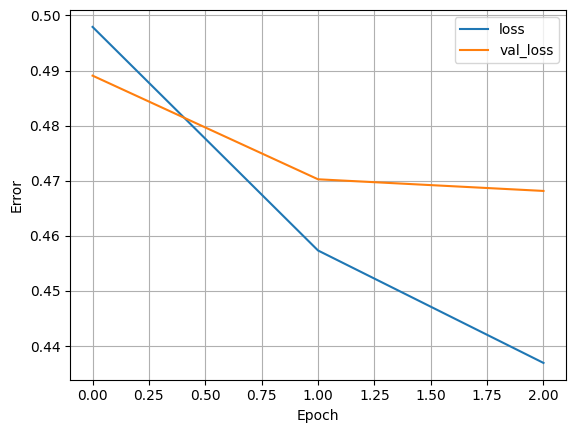

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)
plot_loss(history_dnn)
# Your code here

In [15]:
test_predictions = model.predict(X_test)
y_pred = np.argmax(test_predictions,axis=1)

310/310 [==============================] - 1s 2ms/step


In [16]:
y_test.shape

(9896,)

In [17]:
from sklearn.metrics import classification_report
print(f'Classification report of model: \n {classification_report(y_test,y_pred)}')

Classification report of model: 
               precision    recall  f1-score   support

           0       0.75      0.78      0.77      4560
           1       0.80      0.78      0.79      5336

    accuracy                           0.78      9896
   macro avg       0.78      0.78      0.78      9896
weighted avg       0.78      0.78      0.78      9896

